In [2]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import levene
import scipy.stats as st
import pingouin as pg
import numpy as np
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_6416\2348372001.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
'''
RespondentID - респондент
Sex - пол респондента
AgeGroup - возрастная группа респондента
Weight - вывод по этому параметру далее по notebookу
ResearchDate - дата сессии пользования медиа
Start - начало сессии
Stop - конец сессии
Duration - время сессии в секундах
MediaProductID - айди канала радио или канал телевидения
MediaType - тип медиа
'''
df = pd.read_excel('partner_in_analysis_BI.xlsx', sheet_name = 'data')
df

,RespondentID,Sex,AgeGroup,Weight,ResearchDate,Start,Stop,Duration,MediaProductID,MediaType
0,resp1,Женщины,55+,5.937,2023-02-09,2023-02-09 00:05:36,2023-02-09 00:06:13,37.0,1000435.0,Radio
1,resp1,Женщины,55+,5.937,2023-02-09,2023-02-09 00:05:36,2023-02-09 00:06:13,37.0,1000435.0,Radio
2,resp1,Женщины,55+,5.937,2023-02-09,2023-02-09 00:06:13,2023-02-09 00:06:26,13.0,1000437.0,Radio
3,resp1,Женщины,55+,5.937,2023-02-09,2023-02-09 00:06:26,2023-02-09 00:21:01,875.0,1000438.0,Radio
4,resp1,Женщины,55+,5.937,2023-02-09,2023-02-09 00:20:51,2023-02-09 00:20:57,6.0,16567.0,Mobile
...,...,...,...,...,...,...,...,...,...,...
500094,resp999,Мужчины,55+,3.964,2023-02-10,2023-02-10 23:13:24,2023-02-10 23:16:04,160.0,1873.0,TV
500095,resp999,Мужчины,55+,3.964,2023-02-10,2023-02-10 23:16:04,2023-02-10 23:17:13,69.0,1867.0,TV
500096,resp999,Мужчины,55+,3.964,2023-02-10,2023-02-10 23:16:56,2023-02-10 23:17:01,5.0,17349.0,Mobile
500097,resp999,Мужчины,55+,3.964,2023-02-10,2023-02-10 23:17:13,2023-02-10 23:17:37,24.0,1873.0,TV


In [4]:
df.nunique()

RespondentID        2132
Sex                    2
AgeGroup               5
Weight               337
ResearchDate           3
Start             168175
Stop              178904
Duration            7187
MediaProductID      1628
MediaType              3
dtype: int64

In [5]:
df.Start = pd.to_datetime(df.Start)
df.Stop = pd.to_datetime(df.Stop)
# Переведм колонки Start и Stop в удобный формат

In [6]:
df[(df.Stop - df.Start).dt.total_seconds() != df.Duration]
# Валидация разности колонок Start и Stop и колонки Duration
# Строчка с индексом 470459 не имеет сессии - не будем её считать

,RespondentID,Sex,AgeGroup,Weight,ResearchDate,Start,Stop,Duration,MediaProductID,MediaType
287,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
470459,resp877,Мужчины,55+,11.827,NaT,NaT,NaT,NaN,1000052.0,Radio


In [7]:
df = df[(df.Duration.isna() == False) & (df.Duration > 0)]
# Убираем строчку с NaNами и Duration < 0

<Axes: xlabel='Weight', ylabel='ResearchDate'>

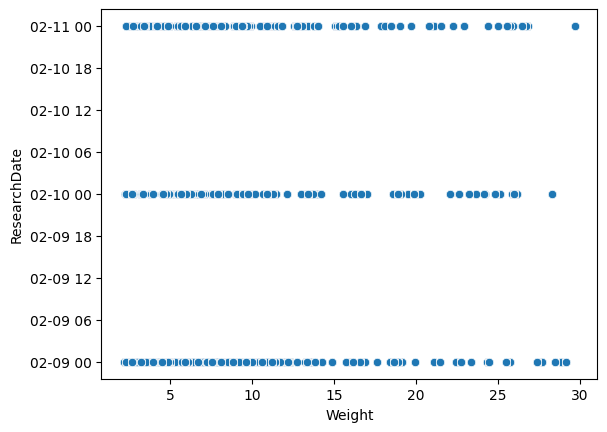

In [8]:
sns.scatterplot(x = 'Weight', y = 'ResearchDate', data = df)

<Axes: xlabel='Weight', ylabel='Duration'>

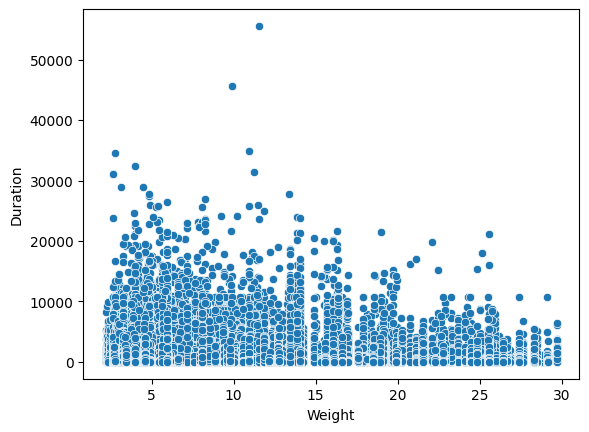

In [9]:
sns.scatterplot(x = 'Weight', y = 'Duration', data = df)

<Axes: xlabel='AgeGroup', ylabel='Duration'>

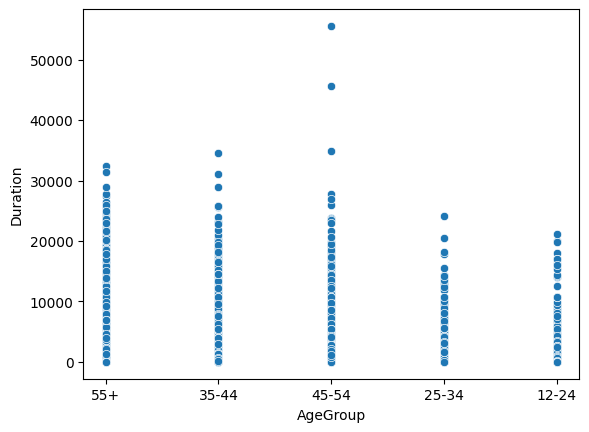

In [10]:
sns.scatterplot(x = 'AgeGroup', y = 'Duration', data = df)

In [11]:
st.pearsonr(df.Weight, df.Duration)

PearsonRResult(statistic=-0.0021073675290891347, pvalue=0.13615276685527747)

Не могу сказать, что такое Weight. По диаграмме рассеивания Weight ни с одной другой колонкой не коррелирует, т.е. нет никакой взаимосвязи.

In [12]:
prep_df = df.groupby(['RespondentID', 'Sex', 'AgeGroup', 'ResearchDate', 'MediaType'] , as_index = False).agg({'Duration': 'sum'})
prep_df

,RespondentID,Sex,AgeGroup,ResearchDate,MediaType,Duration
0,resp1,Женщины,55+,2023-02-09,Mobile,6103.0
1,resp1,Женщины,55+,2023-02-09,Radio,20550.0
2,resp1,Женщины,55+,2023-02-09,TV,12723.0
3,resp1,Женщины,55+,2023-02-11,Mobile,3224.0
4,resp1,Женщины,55+,2023-02-11,Radio,10096.0
...,...,...,...,...,...,...
11577,resp998,Женщины,55+,2023-02-11,TV,45442.0
11578,resp999,Мужчины,55+,2023-02-09,Mobile,1741.0
11579,resp999,Мужчины,55+,2023-02-09,TV,14126.0
11580,resp999,Мужчины,55+,2023-02-10,Mobile,4363.0


<Axes: xlabel='Sex', ylabel='Duration'>

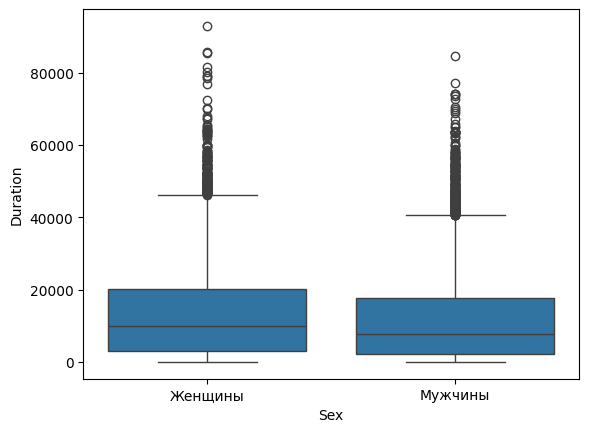

In [13]:
sns.boxplot(data = prep_df, x = 'Sex', y = 'Duration')

<Axes: xlabel='AgeGroup', ylabel='Duration'>

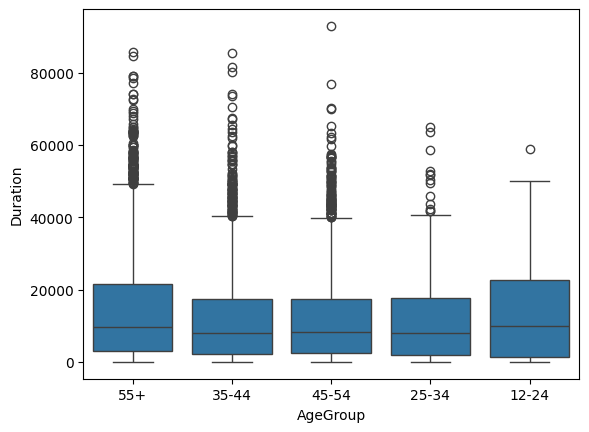

In [14]:
sns.boxplot(data = prep_df, x = 'AgeGroup', y = 'Duration')

<Axes: xlabel='ResearchDate', ylabel='Duration'>

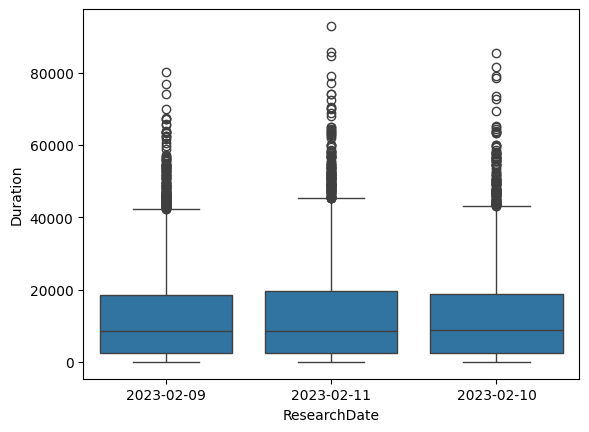

In [15]:
sns.boxplot(data = prep_df, x = 'ResearchDate', y = 'Duration')

<Axes: xlabel='MediaType', ylabel='Duration'>

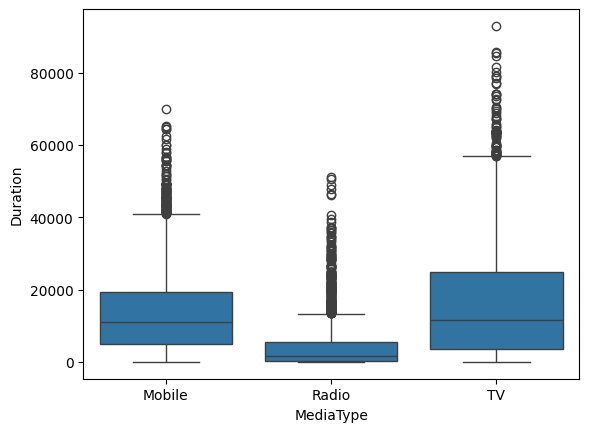

In [16]:
sns.boxplot(data = prep_df, x = 'MediaType', y = 'Duration')

In [17]:
resp_count = df.RespondentID.nunique()
resp_count
# Кол-во рассматриваемых респондентов

2132

In [18]:
df_media_duration = prep_df.groupby(['RespondentID', 'MediaType'], as_index = False).agg({'Duration': 'sum'})
df_media_duration
# Кол-во сессий по медиа и суммарный их просмотр в секундах

,RespondentID,MediaType,Duration
0,resp1,Mobile,9327.0
1,resp1,Radio,30646.0
2,resp1,TV,38774.0
3,resp10,Mobile,17908.0
4,resp10,Radio,3374.0
...,...,...,...
5212,resp997,TV,40065.0
5213,resp998,Mobile,18650.0
5214,resp998,TV,90380.0
5215,resp999,Mobile,6104.0


In [19]:
'''Проверям равенстов дисперсий'''
levene(df_media_duration[df_media_duration.MediaType == 'Mobile'].Duration, df_media_duration[df_media_duration.MediaType == 'Radio'].Duration, df_media_duration[df_media_duration.MediaType == 'TV'].Duration)
# Дисперсии не равны, следовательно применим дисперсионный анализ Уэлча

LeveneResult(statistic=354.3679700694613, pvalue=5.0008888993729546e-145)

In [20]:
pg.welch_anova(data=df_media_duration, dv="Duration", between="MediaType")
# Какие-то из групп статистически различаются

,Source,ddof1,ddof2,F,p-unc,np2
0,MediaType,2,3290.468179,934.844484,3.260833e-322,0.141166


In [21]:
pg.pairwise_tukey(data = df_media_duration, dv = 'Duration', between = 'MediaType')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Mobile,Radio,33245.545931,7720.213027,25525.332904,1031.518929,24.745385,8.685275e-13,1.088157
1,Mobile,TV,33245.545931,36779.613473,-3534.067543,938.426652,-3.765950,4.921693e-04,-0.107193
2,Radio,TV,7720.213027,36779.613473,-29059.400446,1062.691986,-27.345083,8.685275e-13,-0.966902


Есть статистическое различие между просмотром разных медиа

In [22]:
resp_sex_duration = prep_df.groupby(['RespondentID', 'Sex'], as_index = False).agg({'Duration': 'sum'})
resp_sex_duration 
# Респондентов по полу и суммарный просмотр медиа в секундах

,RespondentID,Sex,Duration
0,resp1,Женщины,78747.0
1,resp10,Мужчины,186115.0
2,resp100,Мужчины,91125.0
3,resp1000,Женщины,42305.0
4,resp1001,Женщины,34711.0
...,...,...,...
2127,resp995,Мужчины,34073.0
2128,resp996,Женщины,99890.0
2129,resp997,Мужчины,40065.0
2130,resp998,Женщины,109030.0


In [23]:
resp_sex_duration.groupby('Sex').agg({'Duration': 'sum'})

,Duration
Sex,
Женщины,74724291.0
Мужчины,71807359.0


In [24]:
ttest_ind(resp_sex_duration[resp_sex_duration.Sex == 'Мужчины'].Duration, resp_sex_duration[resp_sex_duration.Sex == 'Женщины'].Duration)

TtestResult(statistic=-3.4122623255247717, pvalue=0.0006562986610943554, df=2130.0)

Разница между просмотром медиа мужчин и женщин статистически значима

In [25]:
resp_agegroup_duration = prep_df.groupby(['RespondentID', 'AgeGroup'], as_index = False).agg({'Duration': 'sum'})
resp_agegroup_duration
# Респондентов по возрастным группам и суммарный просмотр медиа в секундах

,RespondentID,AgeGroup,Duration
0,resp1,55+,78747.0
1,resp10,55+,186115.0
2,resp100,35-44,91125.0
3,resp1000,45-54,42305.0
4,resp1001,45-54,34711.0
...,...,...,...
2129,resp995,35-44,34073.0
2130,resp996,35-44,99890.0
2131,resp997,45-54,40065.0
2132,resp998,55+,109030.0


In [26]:
'''Проверям равенстов дисперсий'''
levene( resp_agegroup_duration[resp_agegroup_duration.AgeGroup == '12-24'].Duration, \
        resp_agegroup_duration[resp_agegroup_duration.AgeGroup == '25-34'].Duration, \
        resp_agegroup_duration[resp_agegroup_duration.AgeGroup == '35-44'].Duration, \
        resp_agegroup_duration[resp_agegroup_duration.AgeGroup == '45-54'].Duration, \
        df[df.AgeGroup == '55+'].Duration)
# Дисперсии не равны, следовательно применим дисперсионный анализ Уэлча

LeveneResult(statistic=38858.25209426461, pvalue=0.0)

In [27]:
'С помощью дисперсионного анализа проверяем статистическое различие между суммарным просмотром медиа по возрастным группам'
pg.welch_anova(data=resp_agegroup_duration, dv="Duration", between="AgeGroup")
# Какие-то из групп статистически различаются

,Source,ddof1,ddof2,F,p-unc,np2
0,AgeGroup,4,513.366437,19.666208,4.490396e-15,0.037801


In [28]:
pg.pairwise_tukey(data = resp_agegroup_duration, dv = 'Duration', between = 'AgeGroup')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,12-24,25-34,59403.545455,57322.257576,2081.287879,5629.208493,0.369730,9.960234e-01,0.053195
1,12-24,35-44,59403.545455,62505.543036,-3101.997581,4939.459814,-0.628003,9.705878e-01,-0.071266
2,12-24,45-54,59403.545455,65102.232653,-5698.687199,5039.196713,-1.130872,7.901866e-01,-0.131042
3,12-24,55+,59403.545455,81157.847458,-21754.302003,4907.065366,-4.433261,9.527482e-05,-0.440550
4,25-34,35-44,57322.257576,62505.543036,-5183.285460,3719.623705,-1.393497,6.319272e-01,-0.120677
5,25-34,45-54,57322.257576,65102.232653,-7779.975077,3851.083063,-2.020204,2.565371e-01,-0.181812
6,25-34,55+,57322.257576,81157.847458,-23835.589882,3676.496669,-6.483234,1.112174e-09,-0.493500
7,35-44,45-54,62505.543036,65102.232653,-2596.689617,2746.109205,-0.945589,8.789832e-01,-0.058791
8,35-44,55+,62505.543036,81157.847458,-18652.304422,2495.376276,-7.474746,1.339595e-12,-0.391625
9,45-54,55+,65102.232653,81157.847458,-16055.614805,2687.404513,-5.974395,2.696041e-08,-0.333813


Статистически значимо отличается только возрастная группа 55+

In [29]:
df_date_duration = prep_df.groupby(['RespondentID', 'ResearchDate'], as_index = False).agg({'Duration': 'sum'})
df_date_duration

,RespondentID,ResearchDate,Duration
0,resp1,2023-02-09,39376.0
1,resp1,2023-02-11,39371.0
2,resp10,2023-02-09,60984.0
3,resp10,2023-02-10,54802.0
4,resp10,2023-02-11,70329.0
...,...,...,...
5378,resp998,2023-02-09,24480.0
5379,resp998,2023-02-10,36066.0
5380,resp998,2023-02-11,48484.0
5381,resp999,2023-02-09,15867.0


In [30]:
'''Проверям равенстов дисперсий'''
levene( df_date_duration[df_date_duration.ResearchDate == '2023-02-09'].Duration, \
        df_date_duration[df_date_duration.ResearchDate == '2023-02-10'].Duration, \
        df_date_duration[df_date_duration.ResearchDate == '2023-02-11'].Duration)
# Дисперсии равны

LeveneResult(statistic=2.736181347644116, pvalue=0.0649075900096866)

In [31]:
'С помощью дисперсионного анализа проверяем статистическое различие между суммарным просмотром медиа по дням'
pg.anova(data=df_date_duration, dv="Duration", between="ResearchDate")
# Статистически значимых различий не обнаружено

,Source,ddof1,ddof2,F,p-unc,np2
0,ResearchDate,2,5380,2.919815,0.054029,0.001084


In [32]:
pg.pairwise_tukey(data = df_date_duration, dv = 'Duration', between = 'ResearchDate')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,2023-02-09,2023-02-10,26709.159692,26907.553897,-198.394206,603.763103,-0.328596,0.942221,-0.011073
1,2023-02-09,2023-02-11,26709.159692,28072.839022,-1363.679330,608.134561,-2.242397,0.064356,-0.074568
2,2023-02-10,2023-02-11,26907.553897,28072.839022,-1165.285124,608.713039,-1.914342,0.134688,-0.063556


Статистически значимых различий между рассматриываемыми датами нет

In [33]:
'''Разобьём время просмотра медиа на периоды и проанализируем в какой период дня респонденты пользуются медиа чаще'''
bins = [0,5,11,16,22,24]
labels = ['Ночь', 'Утро','День','Вечер','Ночь']
df['time_of_date'] = pd.cut(df['Start'].dt.hour, bins=bins, labels=labels, include_lowest=True, ordered=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6416\2963709008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_date'] = pd.cut(df['Start'].dt.hour, bins=bins, labels=labels, include_lowest=True, ordered=False)


In [34]:
df_time_of_date_duration = df.groupby('time_of_date').agg({'Duration': 'sum'})
df_time_of_date_duration

C:\Users\Admin\AppData\Local\Temp\ipykernel_6416\2851412553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_of_date_duration = df.groupby('time_of_date').agg({'Duration': 'sum'})


,Duration
time_of_date,
Вечер,57804769.0
День,38641024.0
Ночь,18894191.0
Утро,31191666.0


In [35]:
'''Проверям равенстов дисперсий'''
levene( df[df.time_of_date == 'Вечер'].Duration, \
        df[df.time_of_date == 'День'].Duration,  \
        df[df.time_of_date == 'Ночь'].Duration, df[df.time_of_date == 'Утро'].Duration)
# Дисперсии не равны, следовательно применим дисперсионный анализ Уэлча

LeveneResult(statistic=285.4245759140229, pvalue=3.889623863817285e-185)

In [36]:
pg.welch_anova(data=df, dv="Duration", between="time_of_date")
# Какие-то из групп статистически различаются

,Source,ddof1,ddof2,F,p-unc,np2
0,time_of_date,3,180581.249898,250.980766,1.515537e-162,0.001774


Есть статистическое различие между суммарным просмотром в разные периоды дня

In [37]:
'''Проведем многофакторный дисперсионный анализ'''
pg.anova(data = prep_df, dv = 'Duration', between = ['Sex', 'ResearchDate', 'MediaType', 'AgeGroup'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,6.453246e+09,1.0,6.453246e+09,47.111539,7.051057e-12,0.004083
1,ResearchDate,6.344275e+08,2.0,3.172138e+08,2.315800,9.873322e-02,0.000403
2,MediaType,2.045159e+11,2.0,1.022579e+11,746.528078,1.530938e-305,0.114983
3,AgeGroup,1.612193e+10,4.0,4.030483e+09,29.424301,2.213448e-24,0.010138
4,Sex * ResearchDate,8.605177e+07,2.0,4.302589e+07,0.314108,7.304465e-01,0.000055
5,Sex * MediaType,3.367468e+09,2.0,1.683734e+09,12.292000,4.648940e-06,0.002135
6,ResearchDate * MediaType,5.595588e+09,4.0,1.398897e+09,10.212565,2.983057e-08,0.003542
7,Sex * AgeGroup,9.575548e+08,4.0,2.393887e+08,1.747643,1.364678e-01,0.000608
8,ResearchDate * AgeGroup,5.741438e+08,8.0,7.176798e+07,0.523938,8.394140e-01,0.000365
9,MediaType * AgeGroup,1.099082e+11,8.0,1.373853e+10,100.297315,3.364155e-162,0.065264


Выводы:
Основной зависимой переменной является Duration.
1) Рассматривается период 09.02.2023 - 11.02.2023. Выявлено, что суммарный просмотр медиа респондентов по дням сильно не отличается, в том числе различий между буднями и выходным;
2) Рассматриваются разные возрастные группы. Выявлено, что возрастная группа 55+ пользуется медиа гораздо чаще остальных возрастных групп;
3) Рассматриваются различия по просмотрам между Мужчинами и женщинами. Выявлено, что Женщины тратят значительно больше времени на просмотр медиа, чем Мужчины;
4) Рассматриваются различия по просмотрам трех разных медиа. Выявлена стат значимая разница между просмотрами трех разных медиа. Медиа Mobile смотрят гораздо чаще, чем TV или радио;
5) Также были искусственно созданны временные периоды дня (Утро, День, Вечер, Ночь). Выявлено, что просмотры в разные периоды стат значимо различаются. Вечером респонденты тратят сильно больше времени на медиа.
6) Рассматривались влияние на Duration совокупности разных факторов. Выявлено, что Duration совокупностей: MediaType + ResearchDate; MediaType + Sex ; MediaType + AgeGroup сильно отличается

In [41]:
'''Алгоритм расчета пересечения аудиторий разных медиа (Задание 5)'''
def type_of_users_count(df):
    df['watching'] = 1
    task_5 = df.pivot_table(index = 'RespondentID', values = 'watching', columns = 'MediaType')
    task_5 = task_5.fillna(0)

    mobile_radio_tv_users = task_5[(task_5['Mobile'] == 1) & (task_5['Radio'] == 1) & (task_5['TV'] == 1)].shape[0]
    mobile_radio_users = task_5[(task_5['Mobile'] == 1) & (task_5['Radio'] == 1) & (task_5['TV'] == 0)].shape[0]
    mobile_tv_users = task_5[(task_5['Mobile'] == 1) & (task_5['Radio'] == 0) & (task_5['TV'] == 1)].shape[0]
    tv_radio_users = task_5[(task_5['Mobile'] == 0) & (task_5['Radio'] == 1) & (task_5['TV'] == 1)].shape[0]
    only_radio = task_5[(task_5['Mobile'] == 0) & (task_5['Radio'] == 1) & (task_5['TV'] == 0)].shape[0]
    only_tv = task_5[(task_5['Mobile'] == 0) & (task_5['Radio'] == 0) & (task_5['TV'] == 1)].shape[0]
    only_mobile = task_5[(task_5['Mobile'] == 1) & (task_5['Radio'] == 0) & (task_5['TV'] == 0)].shape[0]
    type_of_users = [   'Респонденты, использующие все типы медиа', \
                        'Респонденты, использующие только мобильные и радио медиа', \
                        'Респонденты, использующие только мобильные и тв медиа', \
                        'Респонденты, использующие только тв и радио медиа', \
                        'Респонденты, использующие только радио медиа', \
                        'Респонденты, использующие только тв медиа', \
                        'Респонденты, использующие только мобильные медиа']
    
    result_task_5 = pd.DataFrame({'Кол-во пользователей': [mobile_radio_tv_users, mobile_radio_users, mobile_tv_users, tv_radio_users, only_radio, only_tv, only_mobile]}, index = type_of_users)
    result_task_5.to_excel('task_5.xlsx')
    return result_task_5   

In [42]:
type_of_users_count(df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6416\2243306587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['watching'] = 1


,Кол-во пользователей
"Респонденты, использующие все типы медиа",1157
"Респонденты, использующие только мобильные и радио медиа",136
"Респонденты, использующие только мобильные и тв медиа",623
"Респонденты, использующие только тв и радио медиа",12
"Респонденты, использующие только радио медиа",0
"Респонденты, использующие только тв медиа",19
"Респонденты, использующие только мобильные медиа",185
